In [8]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)
(m, n) = (300, 100)
A = np.random.rand(m, n); A = np.asmatrix(A)
b = A.dot(np.ones((n, 1)))/2; b = np.asmatrix(b)
c = -np.random.rand(n, 1); c = np.asmatrix(c)

In [5]:
x = cp.Variable(shape=(n, ))

constraints = [
    (A * x)[:, None]  <= b,
    x >= 0,
    x <= 1
]

obj = cp.Minimize(c.T * x)
prob = cp.Problem(
    objective=obj,
    constraints=constraints
)
prob.solve()

print("status: {}".format(prob.status))
print("optimal value: {}".format(prob.value))

status: optimal
optimal value: -34.41722425996277


In [6]:
thres = np.arange(0, 1.01, 0.01)

max_violations, obj_vals = [],[]
for t in thres:
    x_itr = x.value >= t
    max_violations.append(np.max(np.dot(A,x_itr)- b.T))
    obj_vals.append(np.dot(c.T,x_itr)[0])

In [15]:
max_violations = np.array(max_violations)
obj_vals = np.array(obj_vals).reshape(101, )

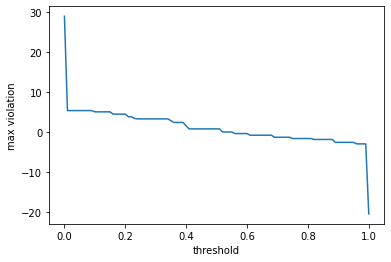

In [16]:
plt.plot(thres, max_violations)
plt.xlabel("threshold")
plt.ylabel("max violation")
plt.show()

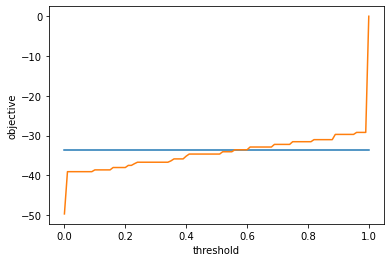

In [21]:
U = obj_vals[(np.asarray(max_violations)<=0)].min()

plt.plot(thres, (np.ones_like(obj_vals) * U))
plt.plot(thres, obj_vals)
plt.xlabel("threshold")
plt.ylabel("objective")
plt.show()

In [22]:
U

-33.57725134530702